<h3>Explanatory Data analysis of Universities in United States</h3>

<h4>Motivation for the project and about the database</h4>
<p>Here I am going to analyse marks obtained by the students. Which gender of students is more focused in their studies. Does parents educational status or race/ethinicity really matters for a student's performace? This is some type of question that will be answered here after the analysis. 
I have taken this database from kaggle.</p>
link : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams 



In [102]:
# starting the project by first installing libraries required for data analysis and visualization
import pandas as pd # for preparing data for analysis
import matplotlib.pyplot as plt # for plotting data 
import seaborn as sns # for plotting data 
%matplotlib inline
# When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code

In [103]:
# importing raw data from which is in the form of csv file
raw_df = pd.read_csv('StudentsPerformance.csv')

In [104]:
raw_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [105]:
# let's get some information about the database
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [106]:
# this tells the statistics about the data about 
raw_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Database contains 1000 rows each containg data about a student. There are 8 columns in the database.
Also maximum score in all tests i.e. maths, reading and writing is 100.

<h4>Data Cleaning</h4>
Out of all the columns in the dataset we won't be using lunch. So we'll just not take it in our data frame for analysis.

In [107]:
performance_df = raw_df[['gender','race/ethnicity','parental level of education','test preparation course','math score','reading score','writing score']]

In [108]:
performance_df #processed data frame for analysis

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95
996,male,group C,high school,none,62,55,55
997,female,group C,high school,completed,59,71,65
998,female,group D,some college,completed,68,78,77


In [109]:
# First of all let's analyse maths score of students
# The very first things that we can check is max and min score in maths
max_math_score = performance_df['math score'].max()
min_math_score = performance_df['math score'].min()

In [110]:
performance_df[performance_df['math score'] == max_math_score] # all the students with score equal to 100

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,completed,100,100,93
451,female,group E,some college,none,100,92,97
458,female,group E,bachelor's degree,none,100,100,100
623,male,group A,some college,completed,100,96,86
625,male,group D,some college,completed,100,97,99
916,male,group E,bachelor's degree,completed,100,100,100
962,female,group E,associate's degree,none,100,100,100


There are 7 students getting a score of 100 in maths test. Out of which 4 are males and 3 are females.

In [111]:
performance_df[performance_df['math score'] == min_math_score] #finding student with minimum math score

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
59,female,group C,some high school,none,0,17,10


Only one student has scored 0 which is minimum among all the students and that student is  female and her parent's education level is upto high school

In [112]:
# now finding what is the mean score in maths
mean_math_score = performance_df['math score'].sum()/1000
mean_math_score

66.089

Mean maths score is 66.089. Now let's see how many students have scored above the average score.

In [206]:
count_above_average_math = int(performance_df[performance_df['math score'] >= mean_math_score].count()[['math score']])
count_above_average_math #number of students scoring equal or more than average marks in math

493

In [207]:
percentage_above_math_average = count_above_average_math*100/1000
percentage_above_math_average # percentage of students having more than average marks in maths

49.3

49.3% students have scored above average marks in maths. Now let's analyse what's the average math score among males and females.

In [115]:
#finding average math score of male students
average_score_male = performance_df[performance_df['gender'] == 'male']['math score'].sum()/performance_df[performance_df['gender'] == 'male']['math score'].count()

In [116]:
print('Average math score among males is {}'.format(round(average_score_male,2)))

Average math score among males is 68.73


In [117]:
# creating a data frame for male students for easy analysis
male_df = performance_df[performance_df['gender']=='male'] # firstly, I am creating a dataframe for only male students

Let's see the trend of marks male students are getting in math

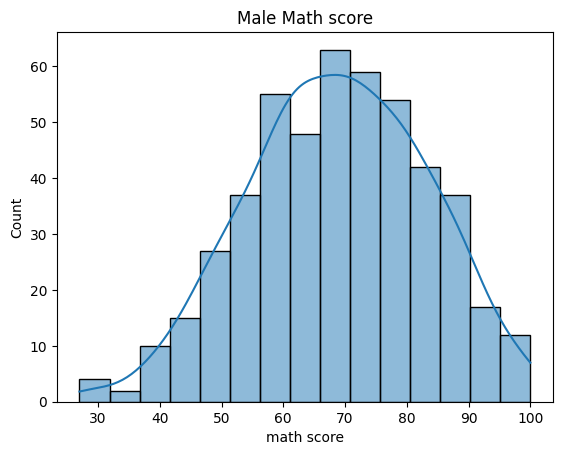

In [118]:
# using histogram in seaborn library for plotting to understand the trend the  marks stored by students
# Here I have used kde=True which shows plot in the form of curve for easy undestanding of area under the curve used for 
# analysis of curve/plot
male_average_trend = sns.histplot(x=male_df['math score'],kde=True).set(title="Male Math score")

Math score of males is mostly between 55 to 80 marks. With an average about 70 marks.

Now we get average score by male students, let's find how many male students have scored above average

In [119]:
#count of male students having score greater than average math score
count_above_average_math = male_df[male_df['math score'] >= mean_math_score]['math score'].count()

In [120]:
count_above_average_math

272

So 272 male students have scored above average score.

In [121]:
#finding percentage of male students scoring more than average in math
percentage_male_above_math = count_above_average_math/male_df['math score'].count()*100

In [122]:
# percentage_above_math_average
print('Percentage of male students scoring above average marks {}%'.format(float(round(percentage_above_math_average,2))))

Percentage of male students scoring above average marks 49.3%


It's quite intersting that 49.3% of male students have score greater than average score. Also, total number of students scoring above average score including both male and female in also 49.3%

In [123]:
female_df = performance_df[performance_df['gender'] == 'female'] # dataframe containing female students 

In [124]:
female_df

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
5,female,group B,associate's degree,none,71,83,78
6,female,group B,some college,completed,88,95,92
...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,none,62,72,74
995,female,group E,master's degree,completed,88,99,95
997,female,group C,high school,completed,59,71,65
998,female,group D,some college,completed,68,78,77


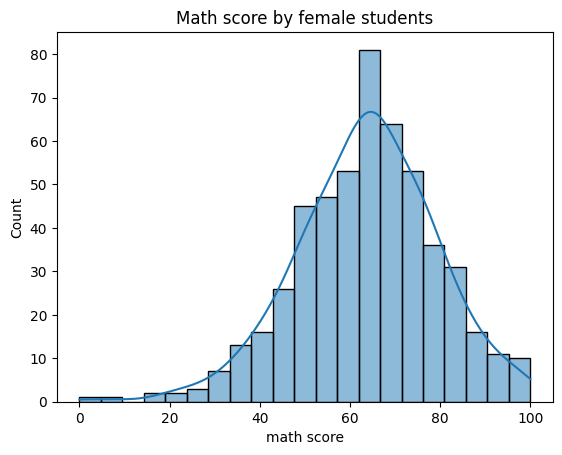

In [125]:
#finding trend of math score among female
female_average_trend = sns.histplot(female_df['math score'],kde=True).set(title='Math score by female students')

Mostly female students score marks in the range of 50 to 80, with an average around 65 marks

In [126]:
# average female math score
average_score_female = round(female_df['math score'].sum()/female_df['math score'].count(),2) # calculating average female score

In [127]:
average_score_female

63.63

The average female score is 63.63 which is less than male students by 5.1.

In [128]:
#finding number of female students geting more than average score in maths
count_female_above_average = female_df[female_df['math score' ]>= mean_math_score]['math score'].count()

In [129]:
count_female_above_average

221

221 female students have math score greater than average score

In [130]:
percentage_female_above_math = round(count_female_above_average/female_df['math score'].count()*100,2)

In [131]:
print('percentage of females scoring more than average score in math : {}'.format(percentage_female_above_math))

percentage of females scoring more than average score in math : 42.66


Male students have done better in math as 49.3% percent male students have scored more than average in math which is 6.5% more than female students where 42.66% of female students have scored above average.

[Text(0.5, 1.0, 'Average score in math'),
 Text(0.5, 0, 'gender'),
 Text(0, 0.5, 'average score in math')]

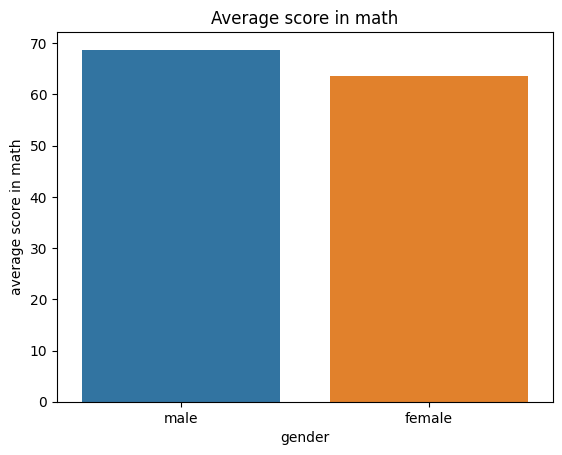

In [132]:
mean_math_plot = sns.barplot(x=['male','female'],y=[average_score_male,average_score_female])
mean_math_plot.set(title='Average score in math',xlabel='gender',ylabel='average score in math')

Here we can conclude that male students have done better in math as compared to female students.

Let's analyse reading score for male and female students

In [133]:
# finding average reading score of the students
average_reading_score = round(performance_df['reading score'].mean(),2)

In [134]:
print('Average reading score of students is {}'.format(average_reading_score))

Average reading score of students is 69.17


[Text(0.5, 1.0, 'Male reading score')]

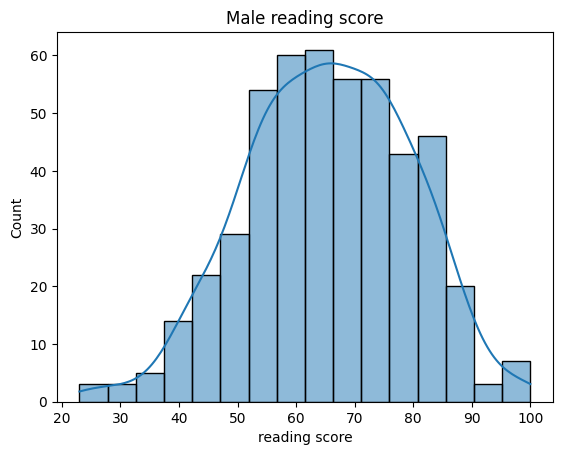

In [135]:
# creating a plot for understanding the performance of male students in maths
reading_score_male_plot = sns.histplot(x=male_df['reading score'],kde=True)
reading_score_male_plot.set(title='Male reading score')

Mostly male students have scored between 52 and 77 marks with an approximate average of about 65 marks

In [136]:
# finding average  male reading score
average_male_reading_score = round(male_df['reading score'].mean(),2)

In [137]:
print('Average reading score among male is {}'.format(average_male_reading_score))

Average reading score among male is 65.47


[Text(0.5, 1.0, 'Female Reading score')]

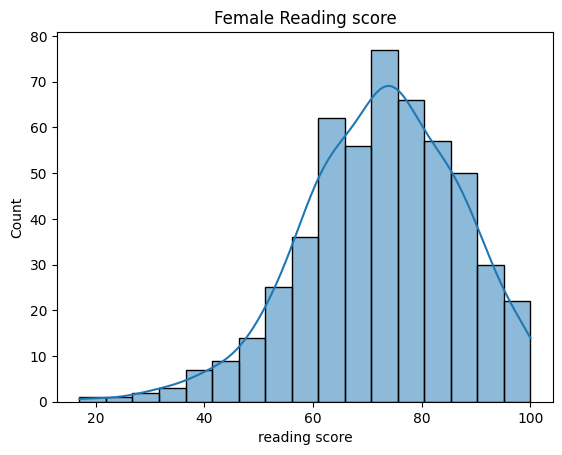

In [138]:
#plotting female reading score 
reading_score_female_plot = sns.histplot(x=female_df['reading score'],kde=True)
reading_score_female_plot.set(title='Female Reading score')

Mostly females have scored marks between 62 and 93. With an approximate average of about 73

In [139]:
average_female_reading_score = round(female_df['reading score'].mean(),2)

In [140]:
print('Average female reading score {}'.format(average_female_reading_score))

Average female reading score 72.61


[Text(0.5, 1.0, 'Average marks in Reading'),
 Text(0.5, 0, 'gender'),
 Text(0, 0.5, 'reading score')]

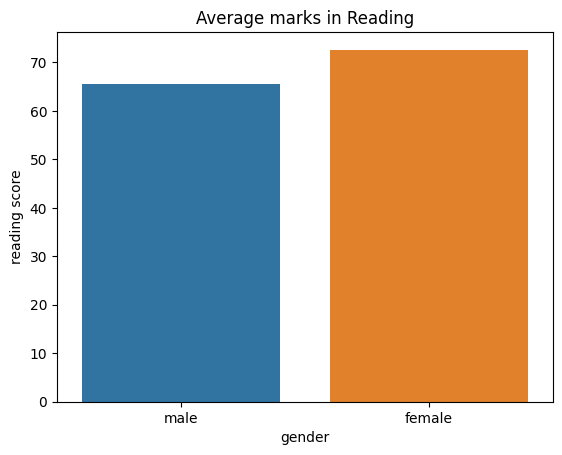

In [141]:
mean_reading_plot = sns.barplot(x=['male','female'],y=[average_male_reading_score,average_female_reading_score])
mean_reading_plot.set(title='Average marks in Reading',xlabel='gender',ylabel='reading score')

It can be observed female students have scored better than male students in reading test with about 7 marks

Let's now analyse writing score of students.

In [142]:
# analysis for writing test
average_writing_score = round(performance_df['writing score'].mean(),2)

In [143]:
print('Average writing score of students is {}'.format(average_writing_score))

Average writing score of students is 68.05


Let's now analyse writing score of male students

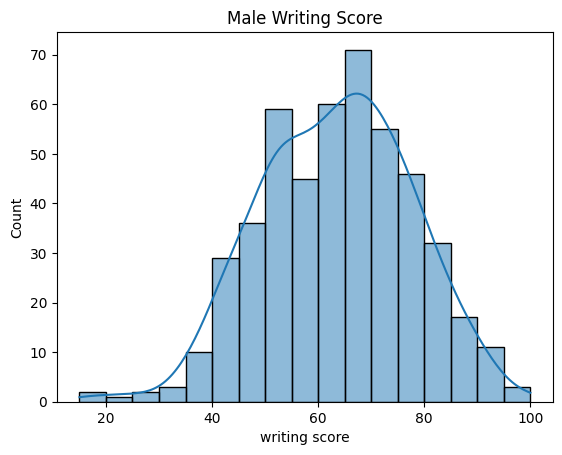

In [144]:
writing_score_male_plot = sns.histplot(x=male_df['writing score'],kde=True).set(title='Male Writing Score')

From here it can be observed that male students are scoring majorly between 50 and 75. With an approximate 64.

In [145]:
average_male_writing_score = round(male_df['writing score'].mean(),2)

In [146]:
print('Average writing score among males {}'.format(average_male_writing_score))

Average writing score among males 63.31


Now let's analyse writing score for female students.

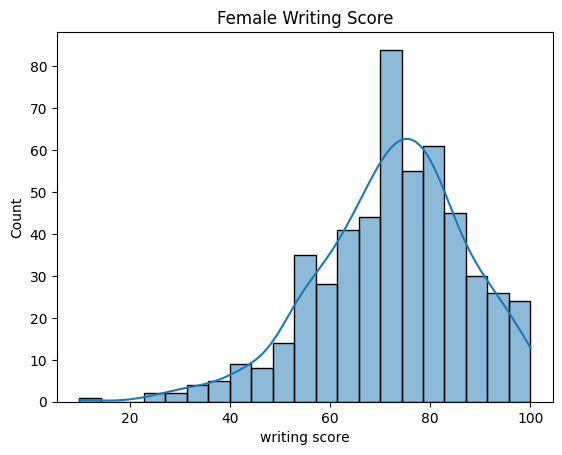

In [147]:
writing_score_female_plot = sns.histplot(x=female_df['writing score'],kde=True).set(title='Female Writing Score')

It can be observed that females are scoring mostly between 62 and 83 marks in writing score, with an approximate average about 75

In [148]:
average_female_writing_score = round(female_df['writing score'].mean(),2)

In [149]:
print('The average female writing score is {}'.format(average_female_writing_score))

The average female writing score is 72.47


The average female reading score is greater than male students by about 10 marks

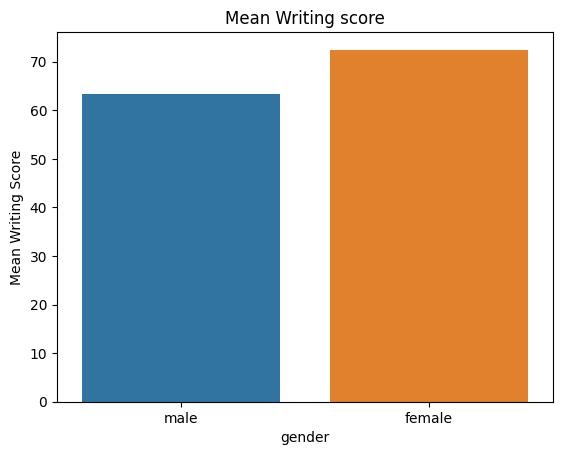

In [150]:
mean_writing_plot = sns.barplot(x=['male','female'],y=[average_male_writing_score,average_female_writing_score]).set(title = 'Mean Writing score',xlabel='gender',ylabel='Mean Writing Score')

Let's now analyse what are the level of education the parents of students have and how parental education level affecting students score.

In [151]:
performance_df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

Here we can see that there are 6 different types of education status given by student's parents. Now let's find percentage of students in each parental level of educational status

In [153]:
percentage_educational_status = performance_df.groupby('parental level of education')[['parental level of education']].count()*100 / 1000

In [154]:

percentage_educational_status # percentage of students in each parental level of education

,parental level of education
parental level of education,
associate's degree,22.2
bachelor's degree,11.8
high school,19.6
master's degree,5.9
some college,22.6
some high school,17.9


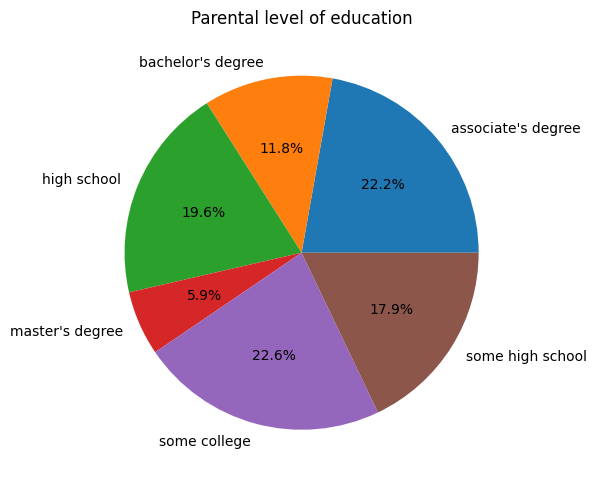

In [221]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x=percentage_educational_status['parental level of education'], labels=percentage_educational_status.index, autopct='%.1f%%')
ax.set_title('Parental level of education')
plt.tight_layout()

Let's find the performance of students on the basis of their parental level of education. For this will be creating a new column final_score that will be consisting of percentage of marks a student get in math, reading and writing.

In [156]:
performance_df['final_score'] = round((performance_df['math score']+performance_df['reading score']+performance_df['writing score'])/3,2)

In [157]:
performance_df

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,final_score
0,female,group B,bachelor's degree,none,72,72,74,72.67
1,female,group C,some college,completed,69,90,88,82.33
2,female,group B,master's degree,none,90,95,93,92.67
3,male,group A,associate's degree,none,47,57,44,49.33
4,male,group C,some college,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,94.00
996,male,group C,high school,none,62,55,55,57.33
997,female,group C,high school,completed,59,71,65,65.00
998,female,group D,some college,completed,68,78,77,74.33


In [158]:
perforamance_parental_education = performance_df.groupby('parental level of education')[['final_score']].mean()

In [159]:
perforamance_parental_education #average final score for students grouped according to their parental education level

,final_score
parental level of education,
associate's degree,69.568964
bachelor's degree,71.923983
high school,63.097194
master's degree,73.598644
some college,68.476106
some high school,65.107654


[Text(0.5, 1.0, 'Final score according vs parental education')]

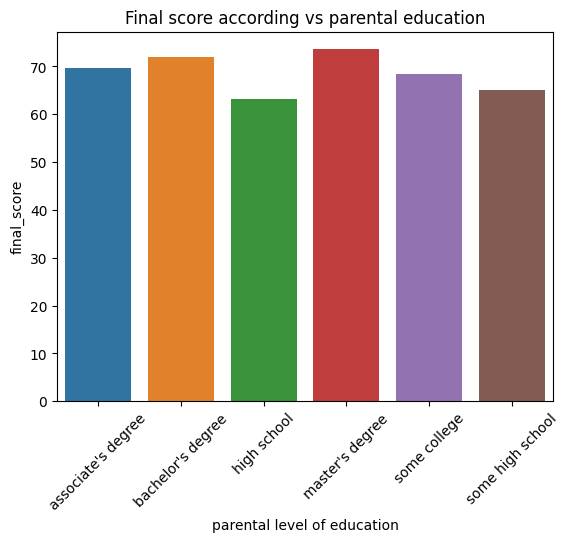

In [160]:
perforamance_parental_education_plot = sns.barplot(x=perforamance_parental_education.index,y=perforamance_parental_education['final_score'])
perforamance_parental_education_plot.set_xticklabels(perforamance_parental_education_plot.get_xticklabels(), rotation=45)
perforamance_parental_education_plot.set(title='Final score according vs parental education')

Even though a huge differnce is not observed in the performance of students based on their parent's education status but students whose parents have done masters have scored better than others. These are followed by bachelors and associate degree. Students whose parents have just studied upto high school have scored the least.

Now lets analyse students ethnicity and how its affecting their performance

In [161]:
ethnicity = performance_df['race/ethnicity'].unique()

In [162]:
ethnicity

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

There are 5 ethnic groups from which students belong and let's analyse further

In [163]:
#lets find number of students in each ethnic group
performance_df.groupby('race/ethnicity').count()['gender']

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: gender, dtype: int64

In [164]:
#for better understanding lets convert number of students into percentage of students
enthnicity_percentage=performance_df.groupby('race/ethnicity').count()['gender']*100/performance_df['race/ethnicity'].count()
enthnicity_percentage

race/ethnicity
group A     8.9
group B    19.0
group C    31.9
group D    26.2
group E    14.0
Name: gender, dtype: float64

From here we can see 31.9% students come from group C category followed by 26.2% from group D and 19% from group B

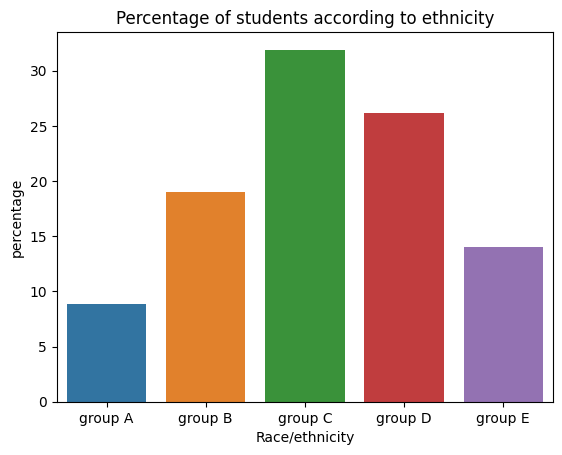

In [165]:
# plotting graph for better understanding
sns.barplot(x=enthnicity_percentage.index,y=enthnicity_percentage).set(title='Percentage of students according to ethnicity',xlabel='Race/ethnicity',ylabel='percentage');

1. Score of male and femal students of diffent group.

Let's now analyse how students from specific ethnic groups are performing. Firsty we'll consider math score

In [166]:
#getting average math score of students from different ethnic group
male_math_ethnic_score=male_df.groupby('race/ethnicity')[['math score']].mean()
male_math_ethnic_score

,math score
race/ethnicity,
group A,63.735849
group B,65.930233
group C,67.611511
group D,69.413534
group E,76.746479


In [167]:
#getting average math score of students from different ethnic group
female_math_ethnic_score=female_df.groupby('race/ethnicity')[['math score']].mean()
female_math_ethnic_score

,math score
race/ethnicity,
group A,58.527778
group B,61.403846
group C,62.033333
group D,65.248062
group E,70.811594


In [168]:
# creating an empty dataframe to store average math marks by male and female students from different ethnic groups
math_ethnic_scores = pd.DataFrame()

In [169]:
# adding female average marks
math_ethnic_scores['female'] = female_math_ethnic_score['math score']

In [170]:
# adding male average marks
math_ethnic_scores['male'] = male_math_ethnic_score['math score']

[Text(0.5, 1.0, 'Math score by different ethnic students'),
 Text(0, 0.5, 'average math score')]

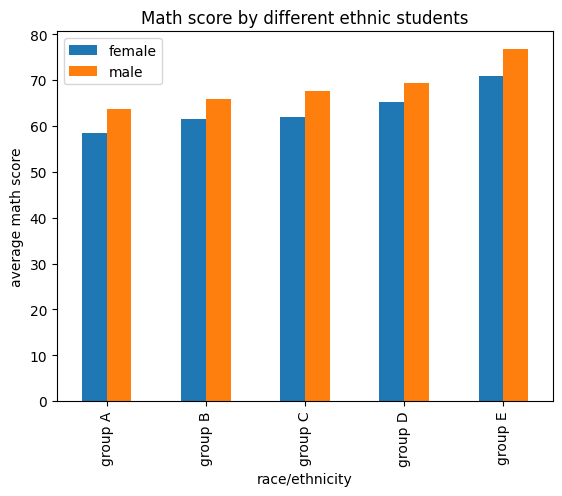

In [171]:
math_ethnic_scores.plot(kind='bar').set(title='Math score by different ethnic students',ylabel='average math score')

Students of group E has given best performance out of all the groups with highest male and female average math score

Now let's analyse female ethnic score

In [172]:
# creating an empty frame for reading score by different ethnic groups
reading_ethnic_score = pd.DataFrame()

In [173]:
reading_ethnic_score['male'] = male_df.groupby('race/ethnicity')[['reading score']].mean()

In [174]:
reading_ethnic_score['female'] = female_df.groupby('race/ethnicity')[['reading score']].mean()

In [175]:
reading_ethnic_score

,male,female
race/ethnicity,,
group A,61.735849,69.000000
group B,62.848837,71.076923
group C,65.424460,71.944444
group D,66.135338,74.046512
group E,70.295775,75.840580


[Text(0.5, 1.0, 'Reading score by different ethnic students'),
 Text(0, 0.5, 'average reading score')]

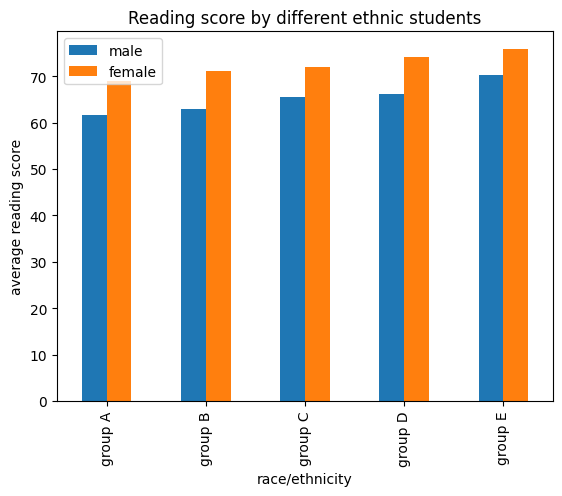

In [176]:
reading_ethnic_score.plot(kind='bar').set(title='Reading score by different ethnic students',ylabel='average reading score')

Again it can be seen that group E students have perfomed better than all the other group students in reading test. Now let's analyse writing score

In [177]:
writing_ethnic_score = pd.DataFrame()

In [178]:
writing_ethnic_score['male'] = male_df.groupby('race/ethnicity')[['writing score']].mean()

In [179]:
writing_ethnic_score['female'] = female_df.groupby('race/ethnicity')[['reading score']].mean()

In [180]:
writing_ethnic_score

,male,female
race/ethnicity,,
group A,59.150943,69.000000
group B,60.220930,71.076923
group C,62.712230,71.944444
group D,65.413534,74.046512
group E,67.394366,75.840580


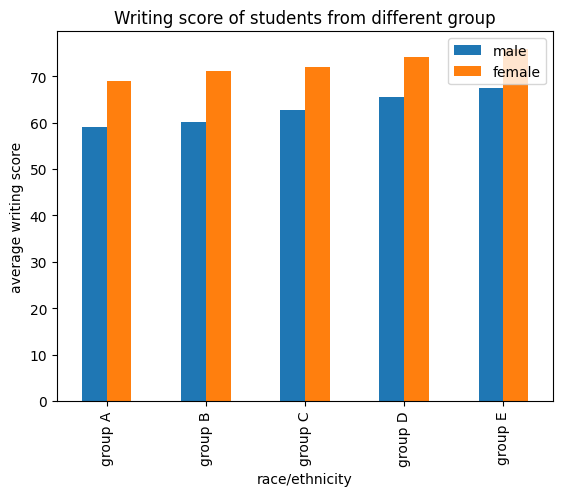

In [181]:
writing_ethnic_score.plot(kind='bar').set(title='Writing score of students from different group',ylabel='average writing score');

Again here we can see that group E students have done best in writing score

<h3>Question 1</h3>
Which ethnic group has done best in overall performance?

In [182]:
# For this question I'll be using final score of all the students belonging to specific group
final_score = pd.DataFrame() # data frame for storing final score

In [183]:
# Final score will be the average of all 3 scores i.e. math, reading and writing
# I just added averages of math, writing and reading in final_score
final_score['math score'] = performance_df.groupby('race/ethnicity')[['math score']].mean()

In [184]:
final_score['writing score'] = performance_df.groupby('race/ethnicity')[['writing score']].mean()

In [185]:
final_score['reading score'] = performance_df.groupby('race/ethnicity')[['reading score']].mean()

In [186]:
final_score

,math score,writing score,reading score
race/ethnicity,,,
group A,61.629213,62.674157,64.674157
group B,63.452632,65.600000,67.352632
group C,64.463950,67.827586,69.103448
group D,67.362595,70.145038,70.030534
group E,73.821429,71.407143,73.028571


In [187]:
# Now we want the final score i.e. average of all the scores
final_score['final score'] = (final_score['math score']+final_score['writing score']+final_score['reading score'])/3

In [188]:
final_score

,math score,writing score,reading score,final score
race/ethnicity,,,,
group A,61.629213,62.674157,64.674157,62.992509
group B,63.452632,65.600000,67.352632,65.468421
group C,64.463950,67.827586,69.103448,67.131661
group D,67.362595,70.145038,70.030534,69.179389
group E,73.821429,71.407143,73.028571,72.752381


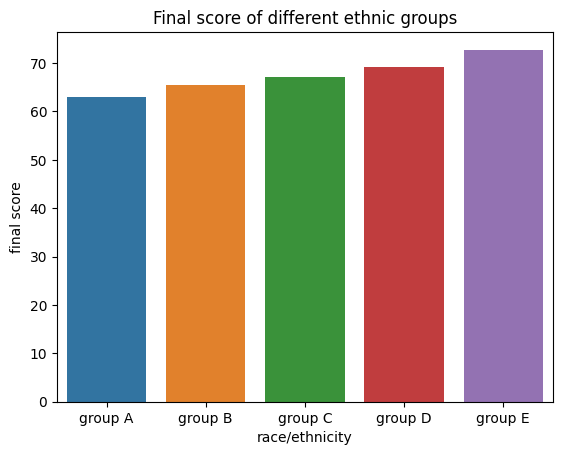

In [189]:
ethnic_final_plot = sns.barplot(y=final_score['final score'],x=final_score.index).set(title='Final score of different ethnic groups')

From here we can see that students from group E has scored the most among all the groups, followed by group D and C. And group A has given the least performance

### Questoin 2
Analyse reading and math score with respect to gender of students

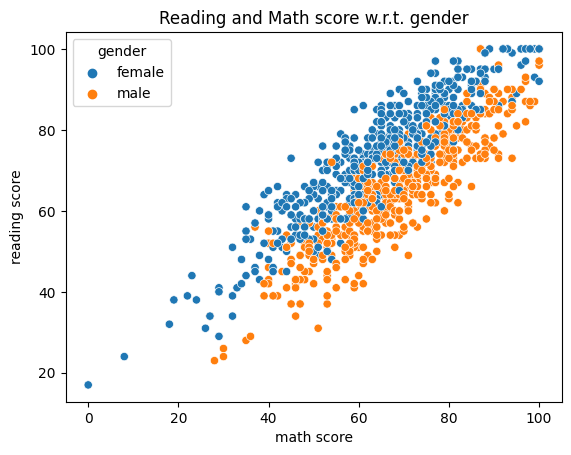

In [190]:
score_analysis_1 = sns.scatterplot(x=performance_df['math score'],y=performance_df['reading score'],hue=performance_df['gender']).set(title='Reading and Math score w.r.t. gender')

Here we can see that reading score of female is more as compared to male whereas math score of males is more. Also mostly femlae students are scoring less marks in both reading and math which can be observed in the range y >= 0 to y <= 40. In this region we can observe more blue points representing female students.

### Question 3
Analyse writing and math score with respect gender of students

[Text(0.5, 1.0, 'Writing and Math score w.r.t. to gender')]

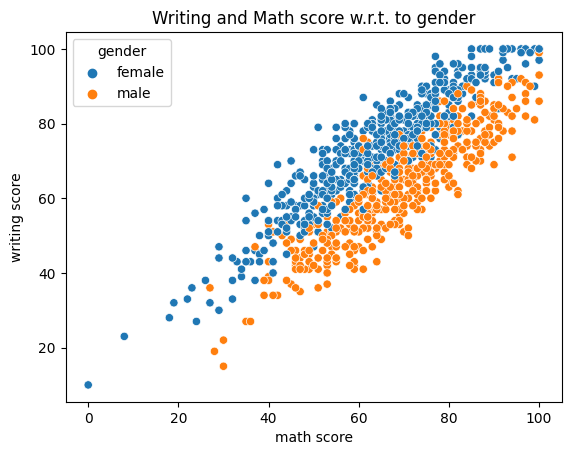

In [209]:
score_analysis_2 = sns.scatterplot(x=performance_df['math score'],y=performance_df['writing score'],hue=performance_df['gender'])
score_analysis_2.set(title='Writing and Math score w.r.t. to gender')

From above scatterplots it's pretty much clear that female are scoring better than male students in writing and reading whereas, male students have performed better than female students in math. It can also be observed that in the range y>=0 to y<= 40 we can obeserve more blue points than orange representing female students. It can be said that students scoring less marks in math and reading both are females.

### Question 4 
Which ethnic group students have performed the best and which parental level of education has done best in that ethnic group?

In [192]:
#First we'll find which ethnic group has given best performance
# For this purspose we'll again look into final score of students
ethnic_final_score = performance_df.groupby('race/ethnicity')[['final_score']].mean()
ethnic_final_score

,final_score
race/ethnicity,
group A,62.992135
group B,65.468579
group C,67.131567
group D,69.179389
group E,72.752000


From here we can see that Group E has performed best among all the ethnic groups. We can also analyse it graphically for better understanding.

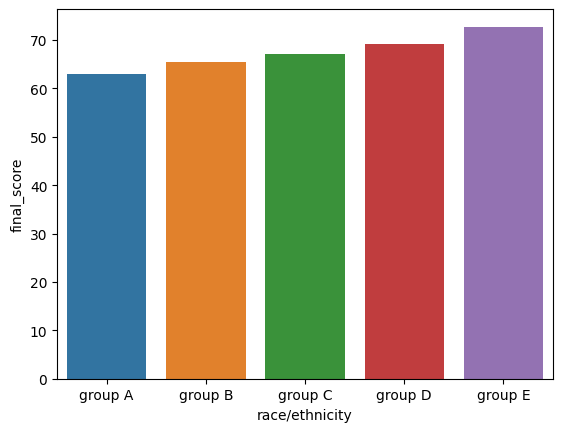

In [193]:
ethnic_final_score_plot = sns.barplot(y=ethnic_final_score['final_score'],x=ethnic_final_score.index)

Its clearly observable from above bar plot that group E has performed the best among all the groups. Now let's analyse how parental level level of education is affecting it.

In [194]:
# our task here is to find that parental level of education that has scored best in Group E
performance_groupE = performance_df[performance_df['race/ethnicity'] == 'group E']
performance_groupE # this data frame contains data about students from group E

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,final_score
32,female,group E,master's degree,none,56,72,65,64.33
34,male,group E,some college,none,97,87,82,88.67
35,male,group E,associate's degree,completed,81,81,79,80.33
44,female,group E,associate's degree,none,50,56,54,53.33
50,male,group E,some college,none,53,55,48,52.00
...,...,...,...,...,...,...,...,...
962,female,group E,associate's degree,none,100,100,100,100.00
968,female,group E,associate's degree,none,68,76,67,70.33
987,male,group E,some high school,completed,81,75,76,77.33
990,male,group E,high school,completed,86,81,75,80.67


In [195]:
# Grouping students of different parental education status and then comparing mean of thier final score
groupE_students_parental_status = performance_groupE.groupby('parental level of education')[['final_score']].mean()
groupE_students_parental_status

,final_score
parental level of education,
associate's degree,73.973333
bachelor's degree,75.592778
high school,69.545455
master's degree,79.083750
some college,72.218571
some high school,69.407222


[Text(0.5, 1.0, 'Final score according vs parental education in groupE')]

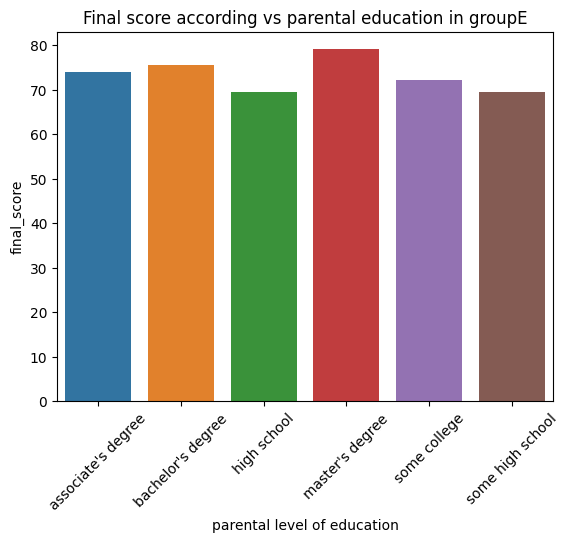

In [196]:
groupE_final_score_plot = sns.barplot(x=groupE_students_parental_status.index,y=groupE_students_parental_status['final_score'])
groupE_final_score_plot.set_xticklabels(groupE_final_score_plot.get_xticklabels(), rotation=45)
groupE_final_score_plot.set(title='Final score according vs parental education in groupE')

Here we can see that in group E, students with parents having master's degree have scored the most followed by students having parents with bachelor's and associate's degree.
Now this trend in group E is similar to what we have found ealier where we observed that among all the students, students  with parents having master's degree have scored the most.

### Question 5
Which gender has performed better?

[Text(0.5, 1.0, 'Average math score vs gender'),
 Text(0.5, 0, 'gender'),
 Text(0, 0.5, 'average math score')]

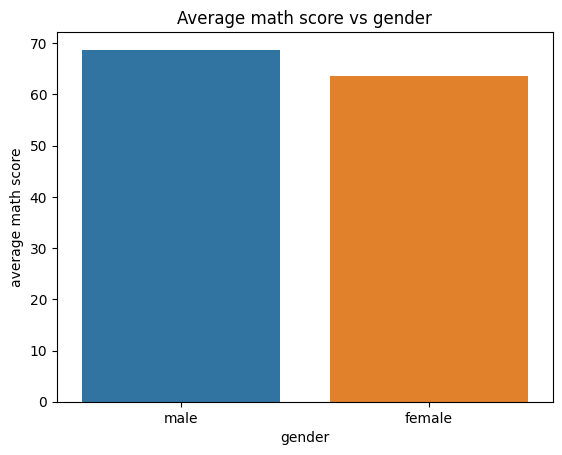

In [201]:
# We'll simply analyse the performance of all the genders w.r.t math, reading, writing and final score
math_average_score = sns.barplot(x=['male','female'],y=[performance_df[performance_df['gender'] == 'male']['math score'].mean(),performance_df[performance_df['gender'] == 'female']['math score'].mean()])
math_average_score.set(title='Average math score vs gender',xlabel='gender',ylabel='average math score')

Male's have done better than females in maths

[Text(0.5, 1.0, 'Average reading score vs gender'),
 Text(0.5, 0, 'gender'),
 Text(0, 0.5, 'average reading score')]

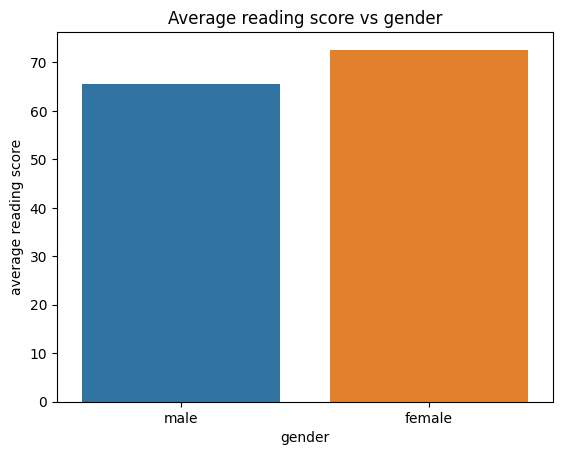

In [203]:
reading_average_score = sns.barplot(x=['male','female'],y=[performance_df[performance_df['gender'] == 'male']['reading score'].mean(),performance_df[performance_df['gender'] == 'female']['reading score'].mean()])
reading_average_score.set(title='Average reading score vs gender',xlabel='gender',ylabel='average reading score')

Females have done better in than males in reading test

[Text(0.5, 1.0, 'Average writing score vs gender'),
 Text(0.5, 0, 'gender'),
 Text(0, 0.5, 'average writing score')]

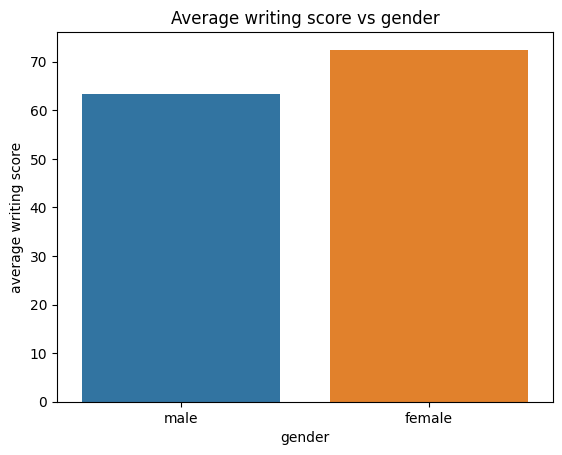

In [204]:
writing_average_score = sns.barplot(x=['male','female'],y=[performance_df[performance_df['gender'] == 'male']['writing score'].mean(),performance_df[performance_df['gender'] == 'female']['writing score'].mean()])
writing_average_score.set(title='Average writing score vs gender',xlabel='gender',ylabel='average writing score')

Females have done better than males in writing test.
So far now males have done better in math score and females have done better in reading and writing test. Final conlusion can be given using final score which is average score of math, reading and writing score.

[Text(0.5, 1.0, 'Final score vs gender'),
 Text(0.5, 0, 'gender'),
 Text(0, 0.5, 'average Final score')]

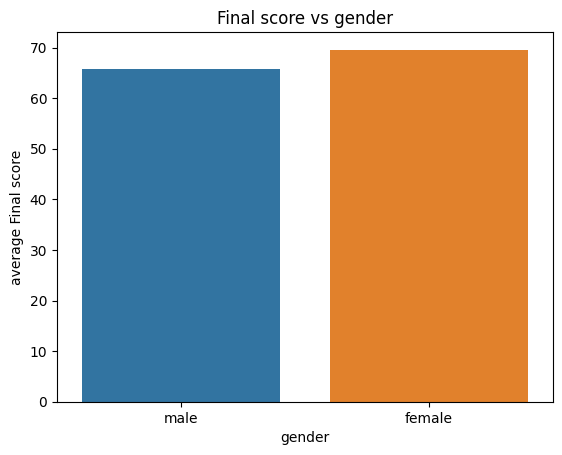

In [205]:
final_average_score = sns.barplot(x=['male','female'],y=[performance_df[performance_df['gender'] == 'male']['final_score'].mean(),performance_df[performance_df['gender'] == 'female']['final_score'].mean()])
final_average_score.set(title='Final score vs gender',xlabel='gender',ylabel='average Final score')

From here we can observe that females students have done better than male students in overall performance.